In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [49]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d6b076330f9b4db5a4622b66bb96251b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='r-bz20XikNx0_h2O25AiKGx92cyToVYyE3i-QKwJhl4I',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_d6b076330f9b4db5a4622b66bb96251b.get_object(Bucket='naturalgaspriceprediction-donotdelete-pr-cnuixmhzvvzgxc',Key='daily_csv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Date,Price
0,07-01-1997,3.82
1,08-01-1997,3.80
2,09-01-1997,3.61
3,10-01-1997,3.92
4,13-01-1997,4.00


In [50]:
#data=pd.read_csv('daily_csv.csv')

In [51]:
data

,Date,Price
0,07-01-1997,3.82
1,08-01-1997,3.80
2,09-01-1997,3.61
3,10-01-1997,3.92
4,13-01-1997,4.00
...,...,...
5933,05-08-2020,2.23
5934,06-08-2020,2.26
5935,07-08-2020,2.15
5936,10-08-2020,2.18


In [52]:
data.isnull().any()

Date     False
Price     True
dtype: bool

In [53]:
#data.head()

In [54]:
data.tail()

,Date,Price
5933,05-08-2020,2.23
5934,06-08-2020,2.26
5935,07-08-2020,2.15
5936,10-08-2020,2.18
5937,11-08-2020,2.19


In [55]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day

In [56]:
data.drop('Date',axis=1,inplace=True)

In [57]:
data

,Price,year,month,day
0,3.82,1997,7,1
1,3.80,1997,8,1
2,3.61,1997,9,1
3,3.92,1997,10,1
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,5,8
5934,2.26,2020,6,8
5935,2.15,2020,7,8
5936,2.18,2020,10,8


In [58]:
data['Price'].fillna(data['Price'].median(),inplace=True)

In [59]:
data.isnull().any()

Price    False
year     False
month    False
day      False
dtype: bool

In [60]:
data.describe()

,Price,year,month,day
count,5938.000000,5938.000000,5938.000000,5938.000000
mean,4.189121,2008.366959,6.517346,15.662849
std,2.191042,6.825348,3.414311,8.794560
min,1.050000,1997.000000,1.000000,1.000000
25%,2.660000,2002.000000,4.000000,8.000000
50%,3.540000,2008.000000,7.000000,16.000000
75%,5.240000,2014.000000,9.000000,23.000000
max,18.480000,2020.000000,12.000000,31.000000


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

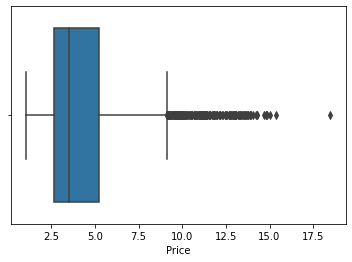

In [61]:
sns.boxplot(data['Price'])

In [62]:
from scipy import stats

In [63]:
y=np.abs(stats.zscore(data))
y

,Price,year,month,day
0,0.168482,1.665544,0.141374,1.667404
1,0.177611,1.665544,0.434283,1.667404
2,0.264335,1.665544,0.727193,1.667404
3,0.122838,1.665544,1.020102,1.667404
4,0.086323,1.665544,1.616083,0.302809
...,...,...,...,...
5933,0.894226,1.704531,0.444445,0.871390
5934,0.880532,1.704531,0.151536,0.871390
5935,0.930741,1.704531,0.141374,0.871390
5936,0.917048,1.704531,1.020102,0.871390


In [64]:
threshold=3
np.where(y>threshold)

(array([1534, 1535, 1538, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171,
        2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184,
        2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195,
        2196, 2197, 2198, 2199, 2200, 2209, 2210, 2213, 2214, 2215, 2216,
        2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227,
        2228, 2229, 2230, 2231, 2232, 2233, 2234, 2820, 2821, 2822, 2825,
        2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836,
        2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847,
        2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858,
        2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869,
        2870, 2871, 2872, 2873, 2874, 2875, 2876]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [65]:
df_no_outliers=data[(y<=3).all(axis=1)]
df_no_outliers

,Price,year,month,day
0,3.82,1997,7,1
1,3.80,1997,8,1
2,3.61,1997,9,1
3,3.92,1997,10,1
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,5,8
5934,2.26,2020,6,8
5935,2.15,2020,7,8
5936,2.18,2020,10,8


In [66]:
df_no_outliers.shape

(5821, 4)

# DATA VISUALIZATION

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


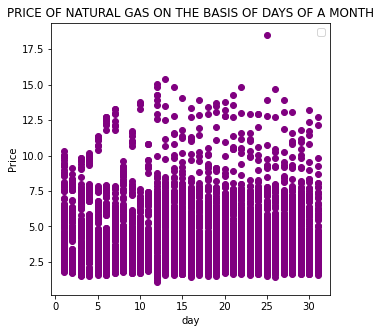

In [67]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['day'],data['Price'],color='purple')
plt.xlabel('day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


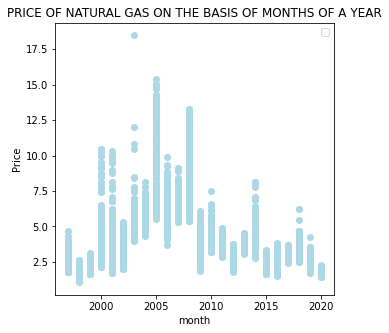

In [68]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['year'],data['Price'],color='lightblue')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

<AxesSubplot:>

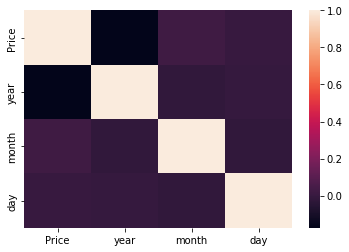

In [69]:
#heat map
sns.heatmap(data.corr())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


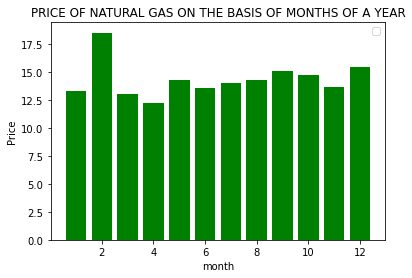

In [70]:
plt.bar(data['month'],data['Price'],color='green')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

<AxesSubplot:xlabel='year', ylabel='Price'>

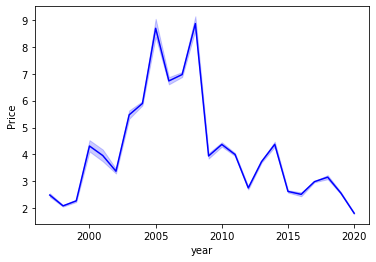

In [71]:
#line graph
sns.lineplot(x='year',y='Price',data=data,color='blue')

<AxesSubplot:xlabel='month', ylabel='Price'>

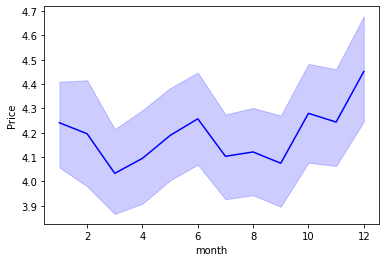

In [72]:
sns.lineplot(x='month',y='Price',data=data,color='blue')

<AxesSubplot:xlabel='day', ylabel='Price'>

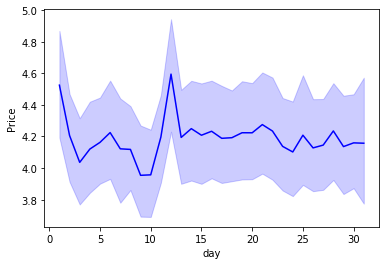

In [73]:
sns.lineplot(x='day',y='Price',data=data,color='blue')

<AxesSubplot:title={'center':'Price'}, xlabel='month'>

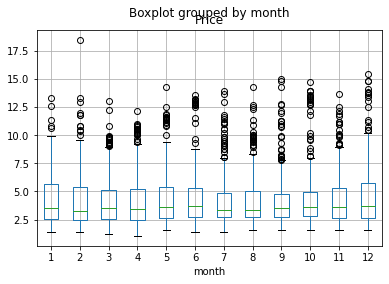

In [74]:
#boxplot
data.boxplot(column='Price',by='month')

<AxesSubplot:>

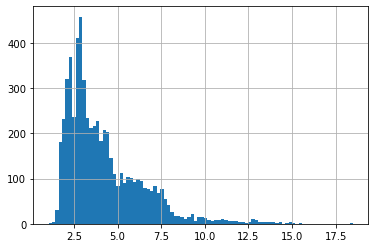

In [75]:
#histogram
data['Price'].hist(bins=90)

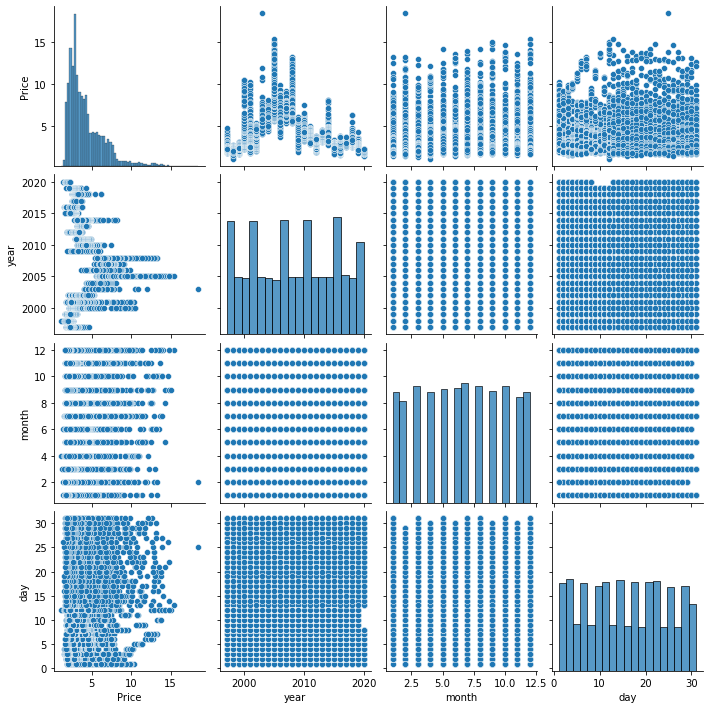

In [76]:
sns.pairplot(data)
plt.show()

# independent and dependent variables

In [77]:
x=x=data.iloc[:,1:4].values
y=data.iloc[:,0].values

In [78]:
x

array([[1997,    7,    1],
       [1997,    8,    1],
       [1997,    9,    1],
       ...,
       [2020,    7,    8],
       [2020,   10,    8],
       [2020,   11,    8]])

In [79]:
y

array([3.82, 3.8 , 3.61, ..., 2.15, 2.18, 2.19])

# Since all values are numerical and no ctegorical data is present there is no need for encoding

In [80]:
#Standardization and splitting testing and training dataset

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [82]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.6655437 ,  0.14137396, -1.66740397],
       [-1.6655437 ,  0.43428345, -1.66740397],
       [-1.6655437 ,  0.72719293, -1.66740397],
       ...,
       [ 1.70453149,  0.14137396, -0.87139035],
       [ 1.70453149,  1.02010241, -0.87139035],
       [ 1.70453149,  1.3130119 , -0.87139035]])

In [83]:
print(x_train.shape) #training input
print(x_test.shape) #testing input
print(y_train.shape) #training output
print(y_test.shape) #testing output

(4750, 3)
(1188, 3)
(4750,)
(1188,)


# Model Building-Decision Tree Regressor

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [85]:
DecisionTreeRegressor()
df_grid = GridSearchCV(DecisionTreeRegressor(),param_grid = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter': ['best', 'random'],'max_depth': range(1, 11),'min_samples_split': range(10, 60, 10),},cv=5,n_jobs=1,scoring='neg_mean_squared_error')
df_grid.fit(x_train, y_train)
print(df_grid.best_params_)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Pyth

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Pyth

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Pyth

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Pyth

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Pyth

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Pyth

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Pyth

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/conda/envs/

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}


In [86]:
df=DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_split=10,splitter='best')
df.fit(x_train,y_train)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=10, min_samples_split=10)

In [87]:
y_pred_df=df.predict(x_test)
y_pred_df

array([3.08315789, 3.05347059, 7.36285714, ..., 2.12333333, 3.69026667,
       4.738     ])

In [88]:
y_test

array([3.56, 3.02, 7.26, ..., 2.09, 4.01, 4.46])

In [89]:
from sklearn.metrics import r2_score
accur_df=r2_score(y_test,y_pred_df)
print(accur_df)

0.9429309113136132


In [90]:
import joblib
joblib.dump(df,"H:\ADS SMARTBRDIGE\Decision Tree Regressor.save")

['H:\\ADS SMARTBRDIGE\\Decision Tree Regressor.save']

In [91]:
#Visualization
#use pydotplus and graphviz

In [92]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(df, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

# Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
rfr = RandomForestRegressor(n_estimators=1, random_state=10)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
y_pred_rfr

array([3.43, 3.  , 7.64, ..., 2.16, 3.77, 4.35])

In [95]:
y_test

array([3.56, 3.02, 7.26, ..., 2.09, 4.01, 4.46])

In [96]:
accur_rfr=r2_score(y_test,y_pred_rfr)
print(accur_rfr)

0.9627657781289101


In [97]:
joblib.dump(rfr,"H:\ADS SMARTBRDIGE\Random Forest Regressor.save")

['H:\\ADS SMARTBRDIGE\\Random Forest Regressor.save']

In [98]:
#Model Evaluation of Decision Tree Regressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred_df)

0.31305976725594775

In [99]:
mean_squared_error(y_test,y_pred_df)

0.30236379024135374

In [100]:
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred_df))

0.5498761590043286

In [101]:
#Model evaluation for Random Forest Regressor
mean_absolute_error(y_test,y_pred_rfr)

0.23324915824915826

In [102]:
mean_squared_error(y_test,y_pred_rfr)

0.1972745791245791

In [103]:
sqrt(mean_squared_error(y_test,y_pred_rfr))

0.44415603015672217

In [104]:
import pickle
pickle.dump(df,open("model.pkl","wb"))
pickle.dump(rfr,open("model1.pkl","wb"))

In [105]:
#We can see that the Decision Tree Regressor is more closer to 0.

In [106]:
pwd

'/home/wsuser/work'

# Deployment

    URL-https://us-south.ml.cloud.ibm.com -DALLAS

In [107]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.7 MB 25.6 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.208
    Uninstalling ibm-watson-machine-learning-1.0.208:
      Successfully uninstalled ibm-watson-machine-learning-1.0.208


In [108]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

# Authenticate and Set Space

In [111]:
wml_credentials={"apikey":"C_kKqVayySQGU1SASahc5nnFVmlogVM4Slpj5GsrXx-E",
                 "url":"https://us-south.ml.cloud.ibm.com"}

In [112]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------  ------------------------
ID                                    NAME               CREATED
ddf4fb0a-6233-4f89-8f8d-2f2bb80b4e5e  Natural gas_model  2022-05-28T16:02:00.226Z
------------------------------------  -----------------  ------------------------


In [113]:
space_id="ddf4fb0a-6233-4f89-8f8d-2f2bb80b4e5e"

In [114]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [115]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

# Save and deploy the model

In [116]:
import sklearn
sklearn.__version__

'1.0.2'

In [133]:
Model_name="Decision Tree Regressor"
Model_1_name="Random Forest Regressor"
Deployment_name="Natural gas_model"
Model=df
Model_1=rfr

In [134]:
#set python version
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [135]:
#setup model meta
model_props={wml_client.repository.ModelMetaNames.NAME:"Decision Tree Regressor",
             wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
             wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}

In [136]:
model_1_props={wml_client.repository.ModelMetaNames.NAME:"Random Forest Regressor",
             wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
             wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}

In [138]:
#save df model
model_details=wml_client.repository.store_model(model=Model,meta_props=model_props,
                                                training_data=x_train,training_target=y_train)

In [139]:
#save rfr model
model_1_details=wml_client.repository.store_model(model=Model_1,meta_props=model_1_props,
                                                training_data=x_train,training_target=y_train)

In [140]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'int'},
      {'name': 'f1', 'type': 'int'},
      {'name': 'f2', 'type': 'int'}],
     'id': '1',
     'type': 'ndarray'},
    'type': 's3'}],
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-05-31T06:23:10.038Z',
  'id': 'b26bf8d6-12ff-4e85-ab34-7a20e06868d6',
  'modified_at': '2022-05-31T06:23:13.422Z',
  'name': 'Decision Tree Regressor',
  'owner': 'IBMid-663003IUVL',
  'resource_key': '7e706f07-2b2e-4729-8f10-5792a9cd2e06',
  'space_id': 'ddf4fb0a-6233-4f89-8f8d-2f2bb80b4e5e'},
 'system': {'warnings': []}}

In [141]:
model_1_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'int'},
      {'name': 'f1', 'type': 'int'},
      {'name': 'f2', 'type': 'int'}],
     'id': '1',
     'type': 'ndarray'},
    'type': 's3'}],
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-05-31T06:23:46.509Z',
  'id': 'eead0911-cd2a-4249-9d05-ca3d720bef9e',
  'modified_at': '2022-05-31T06:23:48.544Z',
  'name': 'Random Forest Regressor',
  'owner': 'IBMid-663003IUVL',
  'resource_key': 'fcdd3387-021d-46cf-a569-e1a575889c7a',
  'space_id': 'ddf4fb0a-6233-4f89-8f8d-2f2bb80b4e5e'},
 'system': {'warnings': []}}

In [142]:
model_id=wml_client.repository.get_model_id(model_details)
model_1_id=wml_client.repository.get_model_id(model_1_details)

In [144]:
model_id

'b26bf8d6-12ff-4e85-ab34-7a20e06868d6'

In [145]:
model_1_id

'eead0911-cd2a-4249-9d05-ca3d720bef9e'

In [146]:
#set meta
deployment_props={wml_client.deployments.ConfigurationMetaNames.NAME:"Natural gas_model",
                  wml_client.deployments.ConfigurationMetaNames.ONLINE: {}}

In [148]:
#DEPLOY
deployment=wml_client.deployments.create(artifact_uid=model_id,meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: 'b26bf8d6-12ff-4e85-ab34-7a20e06868d6' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='121af84c-5fca-429f-b3f3-53fafcba2fde'
------------------------------------------------------------------------------------------------




In [149]:
deployment_1=wml_client.deployments.create(artifact_uid=model_1_id,meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: 'eead0911-cd2a-4249-9d05-ca3d720bef9e' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='da14b2af-e790-4ef9-aefc-4e03647d8c04'
------------------------------------------------------------------------------------------------


